# Airline Passenger Satisfaction

In [5]:
mlflow --version


NameError: name 'mlflow' is not defined

# TASK #1

## 1. Dataset Description and Domain

The dataset belongs to the airline industry and focuses on passenger satisfaction prediction.
It contains surveys collected from passengers regarding their overall flight experience.
The goal is to predict whether a passenger is “satisfied” or “neutral or dissatisfied.”

This makes it a supervised machine learning problem of type binary classification.

---

## 2. Features and Their Types

The dataset includes a mix of categorical, ordinal, and numerical features.

🔹 Categorical Features
- Gender (Male, Female)
- Customer Type (Loyal, Disloyal)
- Type of Travel (Personal, Business)
- Class (Eco, Eco Plus, Business)
- Satisfaction (Satisfied, Neutral/Unsatisfied) → Target

🔹 Numerical Features
- Age
- Flight Distance
- Departure Delay in Minutes
- Arrival Delay in Minutes
- id (identifier column)

🔹 Ordinal Features (rated 0–5 or 1–5)

These measure satisfaction levels with specific services:
- Inflight wifi service
- Departure/Arrival time convenience
- Ease of Online booking
- Food and drink
- Seat comfort
- Gate location
- Online boarding
- Inflight entertainment
- On-board service
- Leg room service
- Baggage handling
- Check-in service
- Cleanliness
- Inflight service

These ordinal features are very important because they directly relate to customer satisfaction scores.

---

## 3. Dimensionality

- Rows: 25,977 passengers
- Columns: 24 features (including the **Target Column**  & after dropping the unnamed column)
- Task Type: Binary Classification



In [1]:
import pandas as pd
import numpy as np

# Load my dataset
df = pd.read_csv(r"C:\Users\user\Documents\Machine Learning Project\Airline Passenger Satisfaction.csv")

df = df.drop(columns=['Unnamed: 0'])

# Quick look
df.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 4. Missing Values

The original Kaggle dataset contains very few missing values, as it has been cleaned by the dataset creator.

As per your instructions, I added 10% artificial nulls to each column, using different random rows for each feature to avoid fully empty rows.

After insertion:
- **Each column contains 10% missing values**


In [4]:
df.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

## Adding 10% artificial nulls in each column

In [7]:
null_fraction = 0.1  # 10% missing values
np.random.seed(42)    # for reproducibility

target_col = 'satisfaction'      # the target column
cols_to_null = [c for c in df.columns if c != target_col]   # all except target

for col in cols_to_null:
    n_nulls = int(null_fraction * len(df))
    null_indices = np.random.choice(df.index, n_nulls, replace=False)
    df.loc[null_indices, col] = np.nan


In [9]:
df.isna().sum()

id                                   2597
Gender                               2597
Customer Type                        2597
Age                                  2597
Type of Travel                       2597
Class                                2597
Flight Distance                      2597
Inflight wifi service                2597
Departure/Arrival time convenient    2597
Ease of Online booking               2597
Gate location                        2597
Food and drink                       2597
Online boarding                      2597
Seat comfort                         2597
Inflight entertainment               2597
On-board service                     2597
Leg room service                     2597
Baggage handling                     2597
Checkin service                      2597
Inflight service                     2597
Cleanliness                          2597
Departure Delay in Minutes           2597
Arrival Delay in Minutes             2673
satisfaction                      

### Percentage of nulls in each column

In [12]:
(df.isna().mean() * 100).round(2)

id                                   10.00
Gender                               10.00
Customer Type                        10.00
Age                                  10.00
Type of Travel                       10.00
Class                                10.00
Flight Distance                      10.00
Inflight wifi service                10.00
Departure/Arrival time convenient    10.00
Ease of Online booking               10.00
Gate location                        10.00
Food and drink                       10.00
Online boarding                      10.00
Seat comfort                         10.00
Inflight entertainment               10.00
On-board service                     10.00
Leg room service                     10.00
Baggage handling                     10.00
Checkin service                      10.00
Inflight service                     10.00
Cleanliness                          10.00
Departure Delay in Minutes           10.00
Arrival Delay in Minutes             10.29
satisfactio

### Percentage of nulls in the whole dataset

In [15]:
total_null_percentage = (df.isna().sum().sum() / df.size) * 100
total_null_percentage

9.593310491735961

---
## 5. Outliers

Some numerical features naturally contain outliers:
1. Departure Delay in Minutes
2. Arrival Delay in Minutes

Flight delays can vary from 0 minutes to several hundred.
These values legitimately reflect real-world airline operations.
Overall, the outliers appear realistic, not errors, and represent true operational variability.

---

## 6. Target Class

The target variable is: **Satisfaction**

with two categories:

- Satisfied
- Neutral or dissatisfied

This clearly makes the problem a **binary classification** task.

---

## 7. Why This Dataset Is Interesting

- It represents a real, practical industry application (airline service quality).
  
- It reflects real-world customer satisfaction modeling, a common use-case in machine learning.
- It contains rich and diverse features.
- It allows exploration of:
    - Customer behavior
    - Predictive modeling
    - Missing value imputation
    - Feature importance
    - Classification algorithms

<br>

# TASK #2

# Visualizations

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display settings
plt.style.use('seaborn-v0_8')
sns.set_theme()

### 2.1 Target Variable Distribution

Understanding whether the classes are balanced is essential for classification tasks.

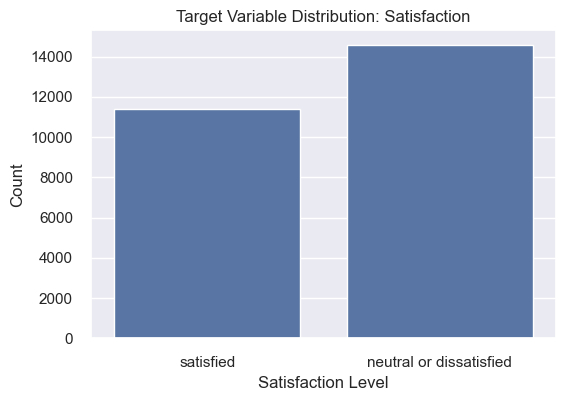

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='satisfaction')
plt.title("Target Variable Distribution: Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

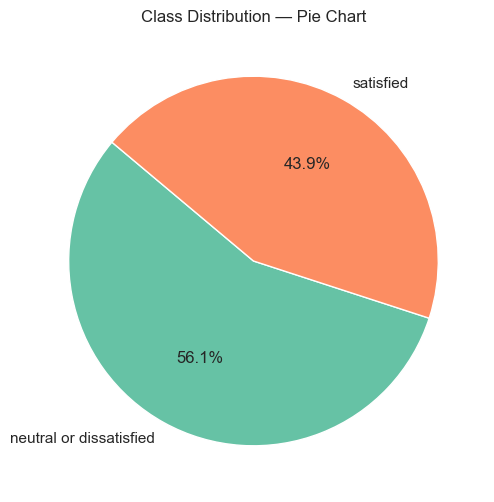

In [53]:
class_counts = df['satisfaction'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
        colors=['#66c2a5', '#fc8d62'], startangle=140)
plt.title("Class Distribution — Pie Chart")
plt.show()


### Class Distribution Analysis

The Airline Passenger Satisfaction dataset contains two target classes:

- **Satisfied**
- **Neutral or Dissatisfied**

After analyzing the class frequencies, the distribution is:

- **Neutral or Dissatisfied:** 56.10%
- **Satisfied:** 43.89%

This distribution is considered **balanced** because neither class exceeds 65–70% dominance.  
which means that:

- Models are less likely to be biased toward a majority class.
- Accuracy, precision, and recall remain meaningful.
- No resampling techniques.


In [45]:
df['satisfaction'].value_counts()


satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [47]:
df['satisfaction'].value_counts(normalize=True) * 100


satisfaction
neutral or dissatisfied    56.101786
satisfied                  43.898214
Name: proportion, dtype: float64

### 2.2 Categorical Feature Distributions

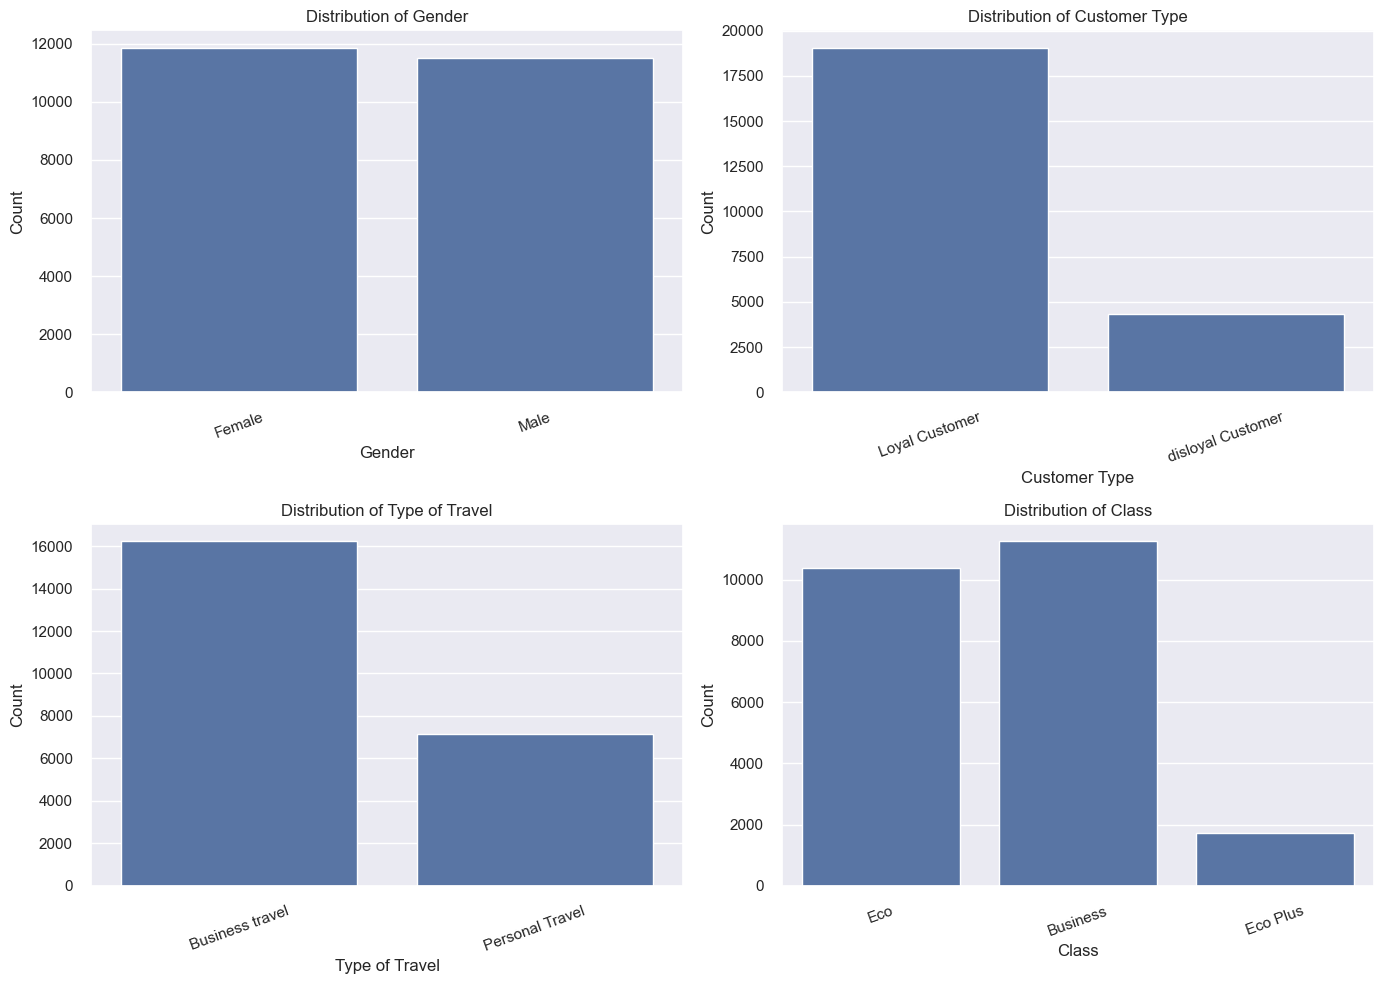

In [26]:
# Select categorical columns except the target
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Make axes indexable

# Loop through categorical features and plot
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


### 2.3 Numerical Feature Distributions

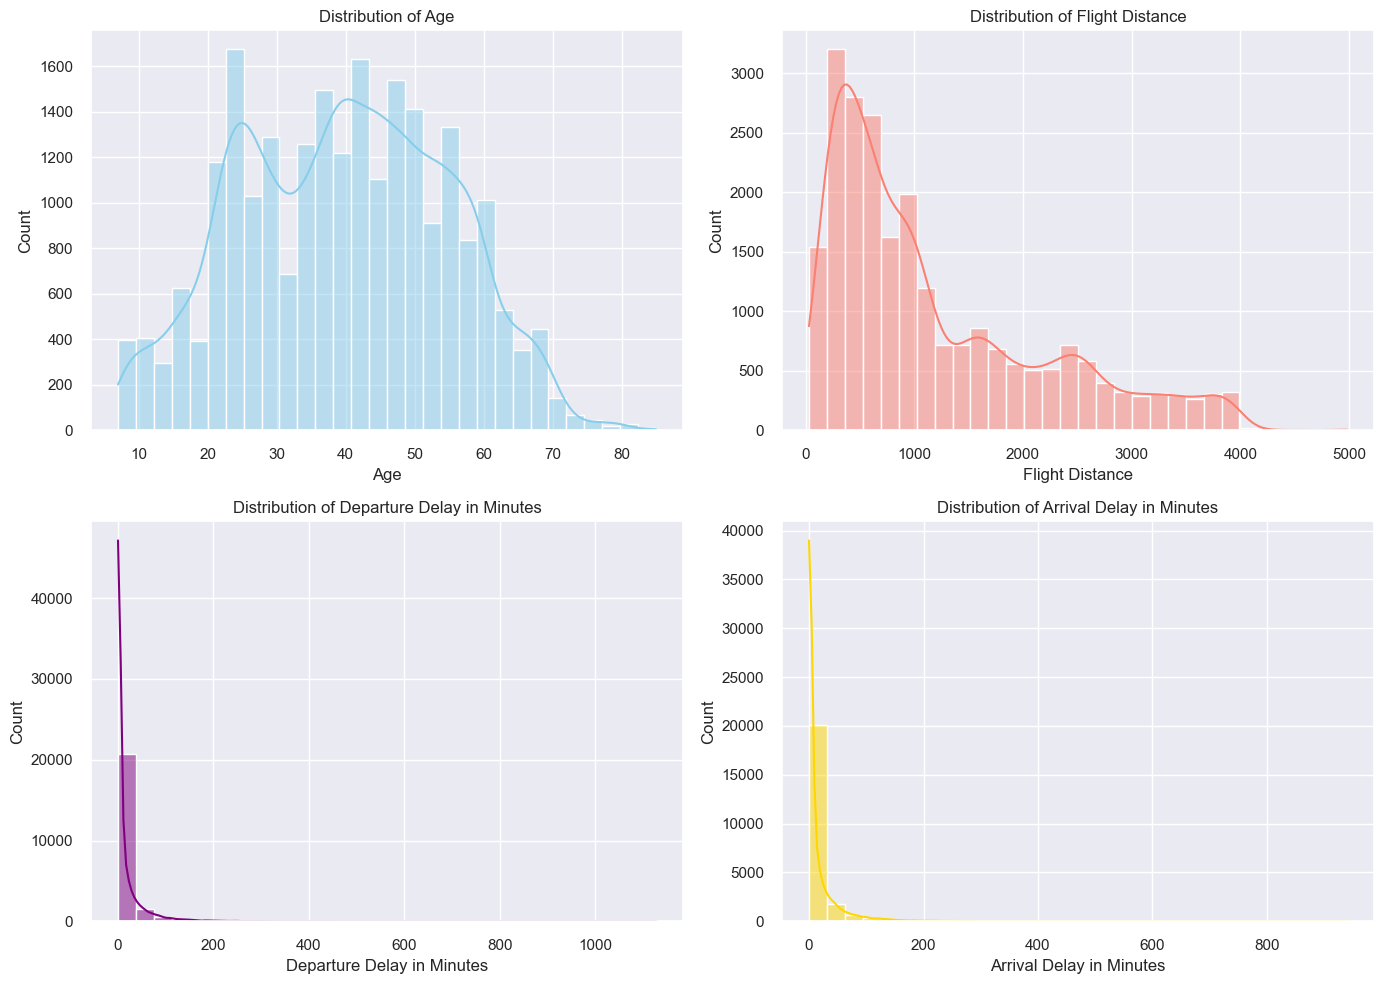

In [29]:
numerical_cols = ['Age', 'Flight Distance', 
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors = ["skyblue", "salmon", "purple", "gold"] 

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


### 2.4 Boxplots to Detect Outliers

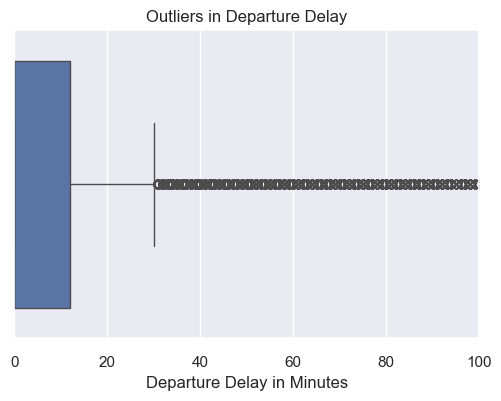

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.xlim(0, 100)   # adjust range manually
plt.title("Outliers in Departure Delay")
plt.show()


**Insights:**

- The main box is squeezed on the far left, indicating that most flights depart with 0–10 minutes of delay.
- A small number of flights experience moderate delays (20–40 minutes), represented by the whisker.
- A long series of outlier points appear between 40 and 100 minutes, representing unusually large delays.

This confirms that the distribution is heavily right-skewed, with a large cluster near zero and many high-delay outliers.

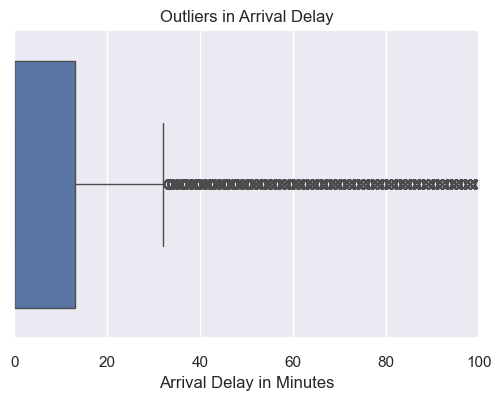

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Arrival Delay in Minutes')
plt.title("Outliers in Arrival Delay")
plt.xlim(0, 100)
plt.show()


**Insights:**
  
Arrival delays show a very similar pattern to departure delays:
- Most flights arrive with delays close to 0–10 minutes.
- Moderate delays occur around 20–40 minutes.
- A significant number of outliers appear beyond 40 minutes.

This again indicates a right-skewed distribution with many extreme values.

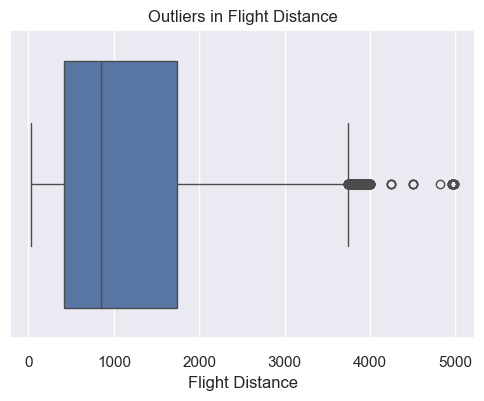

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Flight Distance')
plt.title("Outliers in Flight Distance")
plt.show()


## Handling the Outliers using IQR

In [12]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap instead of remove
    df[column] = df[column].clip(lower_bound, upper_bound)

    print(f"{column}: Capped outliers using IQR")
    return df

# Apply safely
df = cap_outliers_iqr(df, 'Departure Delay in Minutes')
df = cap_outliers_iqr(df, 'Arrival Delay in Minutes')

df.shape

Departure Delay in Minutes: Capped outliers using IQR
Arrival Delay in Minutes: Capped outliers using IQR


(25976, 24)

### 2.6 Average Rating by Satisfaction 

This plot helps identify which service attributes influence satisfaction.

<Figure size 1400x600 with 0 Axes>

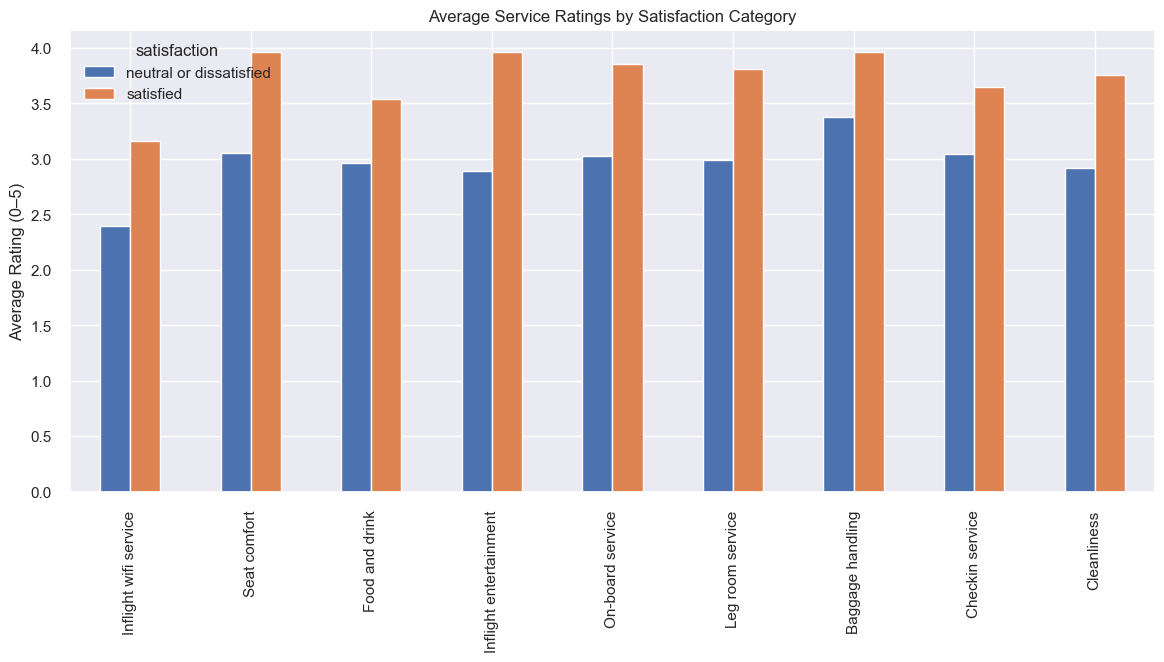

In [37]:
plt.figure(figsize=(14,6))
rating_cols = [
    'Inflight wifi service', 'Seat comfort', 'Food and drink',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Cleanliness'
]

df.groupby('satisfaction')[rating_cols].mean().T.plot(kind='bar', figsize=(14,6))
plt.title("Average Service Ratings by Satisfaction Category")
plt.ylabel("Average Rating (0–5)")
plt.show()


### **Insights:**

- Satisfied passengers consistently give **higher ratings across all service attributes**.
- The **largest rating gaps** appear in **Seat comfort**, **On-board service**, **Inflight entertainment**, and **Cleanliness**, making these the strongest drivers of satisfaction.
- **Food and drink**, **Baggage handling**, and **Check-in service** show moderate differences between the two groups.
- **Inflight WiFi service** has the smallest difference, indicating a lower influence on overall satisfaction.

Overall, these results highlight that **inflight comfort and service quality** have the greatest impact on whether a passenger becomes satisfied.


### Insights

- **Satisfied passengers consistently give higher ratings across all service attributes**, confirming that service quality and comfort are strong drivers of overall satisfaction.

- The **largest rating gaps** appear in:
  - **Seat comfort**
  - **On-board service**
  - **Inflight entertainment**
  - **Cleanliness**

  These features clearly separate satisfied passengers from dissatisfied ones, indicating that they play a major role in shaping the passenger experience.

- **Food and drink**, **Baggage handling**, and **Check-in service** show **moderate differences** between the two satisfaction groups, which means they influence satisfaction but not as strongly as comfort and in-flight services.

- **Inflight WiFi service shows the smallest gap**, suggesting that WiFi quality—while appreciated—has a **relatively weak influence** on whether a passenger becomes satisfied or dissatisfied.

### Conclusion

Overall, the results show that **onboard comfort and service quality** have the biggest impact on passenger satisfaction. Improving these areas is likely to produce the strongest gains in satisfaction levels.


# Correlation between ordinal features and the target

In [62]:
# make sure we have the encoded target
df['satisfaction_encoded'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# 1) Just correlations with the target column
corr_with_target = (
    df.corr(numeric_only=True)['satisfaction_encoded']
      .sort_values(ascending=False)
)

print(corr_with_target)


satisfaction_encoded                 1.000000
Online boarding                      0.496650
Inflight entertainment               0.397504
Seat comfort                         0.343925
On-board service                     0.321743
Cleanliness                          0.315763
Leg room service                     0.308978
Flight Distance                      0.294916
Inflight wifi service                0.285716
Baggage handling                     0.250696
Inflight service                     0.248206
Checkin service                      0.238707
Food and drink                       0.216793
Ease of Online booking               0.154191
Age                                  0.122820
id                                   0.010659
Gate location                       -0.017105
Departure Delay in Minutes          -0.049757
Arrival Delay in Minutes            -0.061771
Departure/Arrival time convenient   -0.064731
Name: satisfaction_encoded, dtype: float64


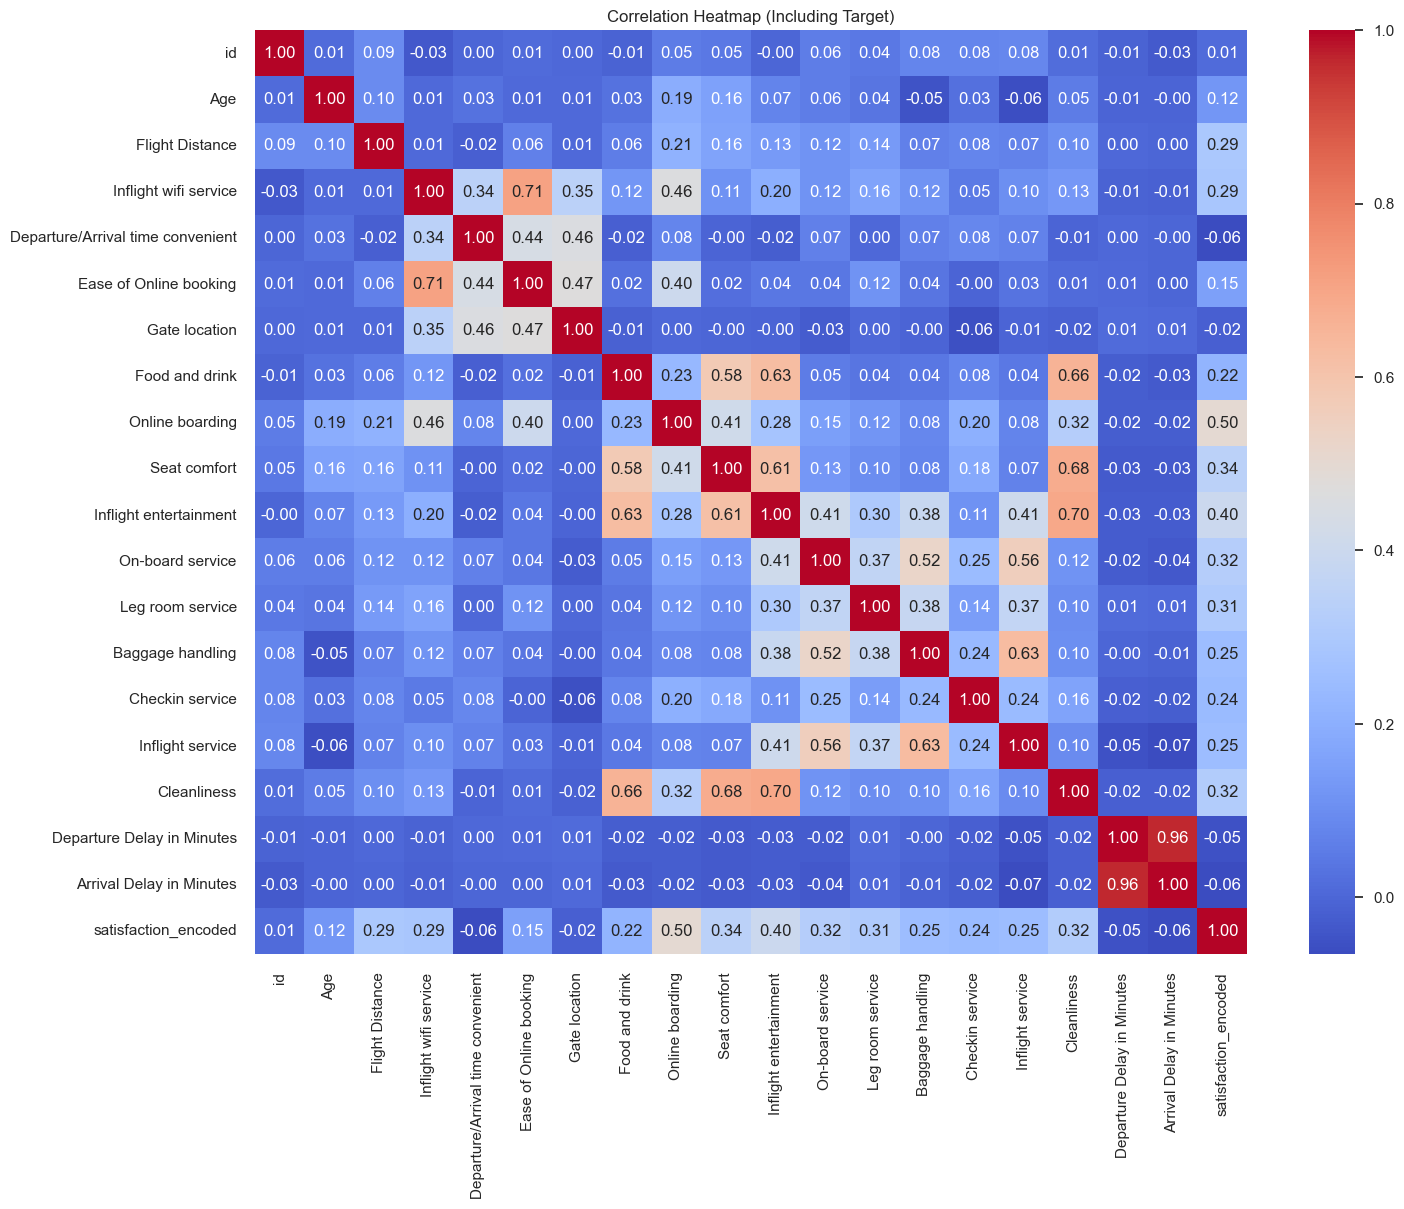

In [64]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr2 = df[numeric_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr2, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Including Target)")
plt.show()


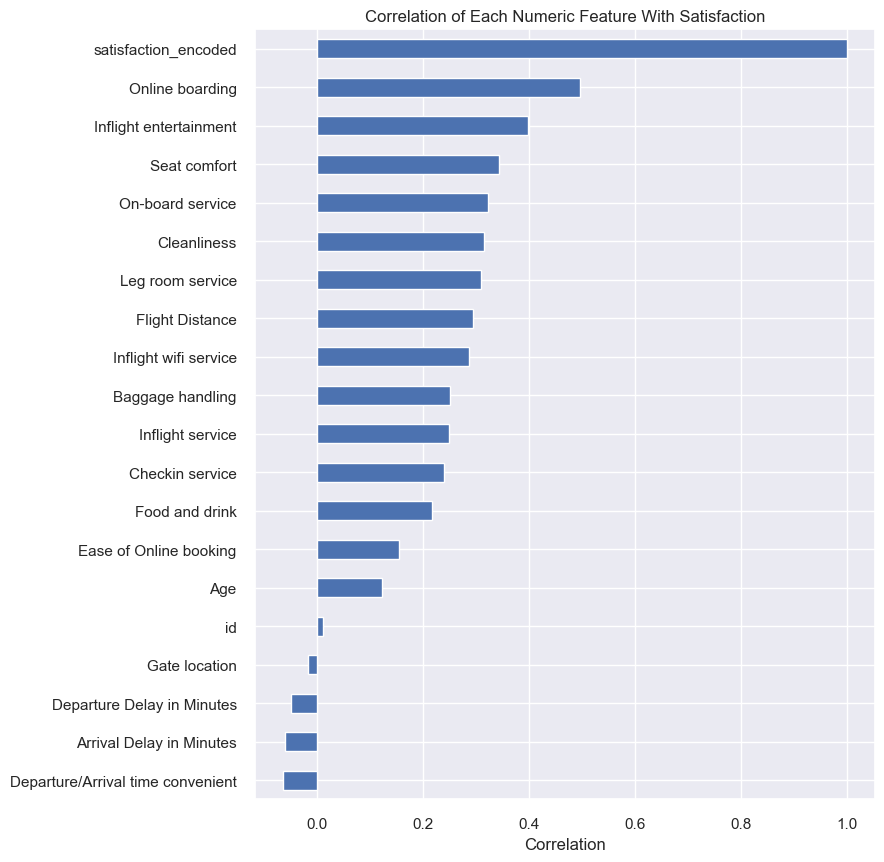

In [74]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation with target
corr_target = df[numeric_cols].corr()['satisfaction_encoded'].sort_values()

# Plot
plt.figure(figsize=(8,10))
corr_target.plot(kind='barh')
plt.title("Correlation of Each Numeric Feature With Satisfaction")
plt.xlabel("Correlation")
plt.show()


### Correlation of Each Numeric Feature With Passenger Satisfaction

The bar chart shows the Pearson correlation between each numeric feature and the
target variable (`satisfaction_encoded`, where 1 = satisfied, 0 = neutral/dissatisfied).

#### **Key Insights**

1. **Strongest Positive Correlations**
   - **Online boarding (~0.55)**  
     This is the strongest predictor of satisfaction. Passengers who rate the online
     boarding process highly are much more likely to report overall satisfaction.

   - **Inflight entertainment (~0.40)**  
     Good entertainment services significantly improve satisfaction.

   - **Seat comfort (~0.38)**  
     More comfortable seats strongly contribute to higher satisfaction.

   - **On-board service & Cleanliness (~0.35)**  
     Quality onboard service and clean cabins are associated with happier passengers.

2. **Medium Positive Correlations**
   - **Leg room service, Flight distance, Inflight wifi service,
     Baggage handling, Inflight service, Check-in service (~0.25–0.35)**  
     These features still contribute meaningfully, but less strongly.

3. **Weak or Near-Zero Correlations**
   - **Age, Gate location, ID**  
     These have almost no relationship with satisfaction.

4. **Negative or Very Weak Correlations**
   - **Departure Delay in Minutes & Arrival Delay in Minutes (~0.00 to −0.03)**  
     Delays show *very weak negative* correlations with satisfaction.  
     This suggests delays slightly reduce satisfaction, but not strongly — probably
     because passengers rate service-related factors much more heavily.

5. **Departure/Arrival time convenient (~0.10)**  
   Surprisingly weak correlation — time convenience matters, but not as much as
   onboard experience.

#### **Conclusion**

Overall, the most influential features on passenger satisfaction are **service-related**
(e.g., online boarding, entertainment, comfort, cleanliness), while demographic and
timing features have very limited impact.


<br>

# TASK #3

## Promising Supervised Learning Algorithms



### **1️. Logistic Regression (Linear Model)**  
- A simple and widely used **linear classifier**.  
- Useful as a **baseline model** to compare more complex algorithms.  
- Interpretable: coefficients show how features such as *Seat comfort*, *On-board service*, and *Inflight entertainment* influence satisfaction.  
- Works well when features have a roughly linear relationship with the target.  
- Fast to train even on large datasets like mine.  
- Limitations: cannot model complex non-linear interactions by itself.

---

### **2️. Decision Tree Classifier (Tree-Based Model)**  
- Captures **non-linear patterns** and interactions between service ratings.  
- Easy to interpret and visualize: splits show which features influence passenger satisfaction the most (e.g., *Seat comfort*, *Cleanliness*, *Inflight service*).  
- Handles mixed data types (categorical, ordinal, numerical) naturally.  
- Not affected by feature scaling.  
- Limitation: A single tree can overfit, so its generalization performance may be weaker.

---

### **3️. K-Nearest Neighbors (Instance-Based Model)**  
- A **distance-based** classifier that predicts satisfaction based on similar passengers.  
- Useful for this dataset because passengers with similar travel class, ratings, and delays are likely to share similar satisfaction outcomes.  
- Non-parametric: does not assume any prior relationship between features and target.  
- Provides a different modeling perspective compared to linear and tree models.  
- Limitation: Slower on large datasets, sensitive to feature scaling, and may be affected by irrelevant features.

---



<br>

# TASK #4

### Replacing Nulls

In [14]:
from sklearn.impute import SimpleImputer

# 1. Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')

# 2. Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

# Select numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply imputers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


### Encoding

In [17]:
# 1. Encode the target column
df['satisfaction_encoded'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# 2. y = target
y = df['satisfaction_encoded']

# 3. X = all features except the original and encoded target
X = df.drop(columns=['satisfaction', 'satisfaction_encoded'])

# 4. Encode categorical columns (Gender, Class, etc.)
X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = X_scaled


In [19]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert X_train & X_test back to DataFrames
X_train = pd.DataFrame(X_train, columns=df.drop('satisfaction', axis=1).columns)
X_test = pd.DataFrame(X_test, columns=df.drop('satisfaction', axis=1).columns)


### Learning Curves for Logistic Regression


In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# --- Feature Selection (SBS) for Logistic Regression ---
sbs_log = SFS(
    estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
    k_features="best",
    forward=False,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sbs_log.fit(X_train, y_train)

selected_idx_log = list(sbs_log.k_feature_idx_)
selected_features_log = X_train.columns[selected_idx_log].tolist()

print("Selected Features (Logistic Regression):", selected_features_log)
print("Best Accuracy from SBS:", sbs_log.k_score_)

# Reduce training/testing to selected features
X_train_log = X_train[selected_features_log]
X_test_log = X_test[selected_features_log]


Selected Features (Logistic Regression): ['id', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_encoded']
Best Accuracy from SBS: 0.8631376323387873


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_log.fit(X_train_log, y_train)

print("Best Logistic Regression Params:", grid_log.best_params_)
best_log_model = grid_log.best_estimator_


Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2'}


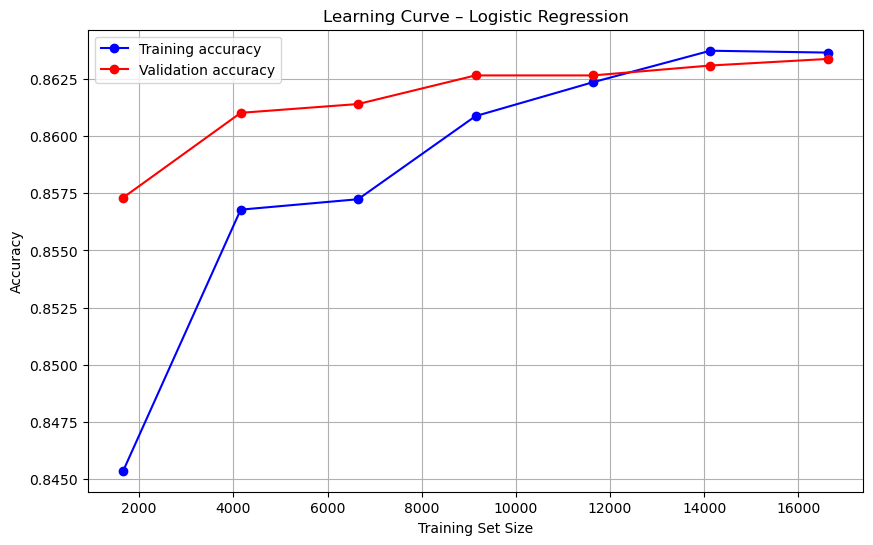

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_clf = best_log_model

# Generate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    log_clf,
    X_train_log,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 7)
)


# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='b', label='Training accuracy')
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color='r', label='Validation accuracy')

plt.title("Learning Curve – Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


<br>

### Learning Curve for Decision Tree Classifier



In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

# --- Feature Selection (SBS) ---
sbs_dt = SFS(
    estimator=DecisionTreeClassifier(random_state=42),
    k_features="best",    
    forward=False,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sbs_dt.fit(X_train, y_train)

selected_idx_dt = list(sbs_dt.k_feature_idx_)
selected_features_dt = X_train.columns[selected_idx_dt].tolist()

print("Decision Tree Selected Features:", selected_features_dt)
print("Decision Tree Best Accuracy from SBS:", sbs_dt.k_score_)

X_train_dt = X_train[selected_features_dt]
X_test_dt = X_test[selected_features_dt]

Decision Tree Selected Features: ['Age', 'Ease of Online booking', 'Gate location', 'Seat comfort', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_encoded']
Decision Tree Best Accuracy from SBS: 0.9163137632338788


In [37]:
# --- Decision Tree Hyperparameter Tuning ---

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train_dt, y_train)


print("Best Hyperparameters:", grid_dt.best_params_)

best_dt = grid_dt.best_estimator_


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}


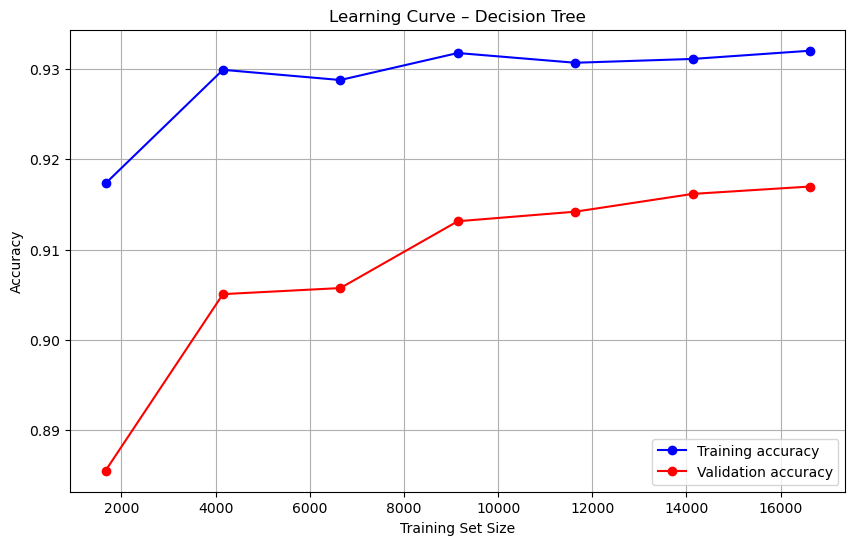

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Decision Tree Model
dt_clf = best_dt

# Generate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_dt,
    X_train_dt, y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 7)
)


# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='b', label='Training accuracy')
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color='r', label='Validation accuracy')

plt.title("Learning Curve – Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# KNN Learning Curve

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

# --- Feature Selection (SBS) for KNN ---
sbs_knn = SFS(
    estimator=KNeighborsClassifier(),
    k_features="best",
    forward=False,
    floating=False,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sbs_knn.fit(X_train, y_train)

selected_idx_knn = list(sbs_knn.k_feature_idx_)
selected_features_knn = X_train.columns[selected_idx_knn].tolist()

print("Selected Features (KNN):", selected_features_knn)
print("Best Accuracy from SBS:", sbs_knn.k_score_)

# Subset the data
X_train_knn = X_train[selected_features_knn]
X_test_knn = X_test[selected_features_knn]


C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

Selected Features (KNN): ['Age', 'Class', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Seat comfort', 'On-board service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_encoded']
Best Accuracy from SBS: 0.9140519730510107


In [48]:
# --- KNN Hyperparameter Tuning (GridSearchCV) ---

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train_knn, y_train)

print("Best KNN Params:", grid_knn.best_params_)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [50]:
# Use the best KNN model found by Grid Search
best_knn = grid_knn.best_estimator_

In [52]:
from sklearn.metrics import accuracy_score

# --- Accuracy BEFORE pruning ---
baseline_knn = KNeighborsClassifier()
baseline_knn.fit(X_train_knn, y_train)

y_pred_before_knn = baseline_knn.predict(X_test_knn)
acc_before_knn = accuracy_score(y_test, y_pred_before_knn)

print("KNN Accuracy BEFORE Pruning:", acc_before_knn)


# --- Accuracy AFTER pruning (best GridSearch model) ---
y_pred_after_knn = best_knn.predict(X_test_knn)
acc_after_knn = accuracy_score(y_test, y_pred_after_knn)

print("KNN Accuracy AFTER Pruning:", acc_after_knn)


KNN Accuracy BEFORE Pruning: 0.9108929946112394
KNN Accuracy AFTER Pruning: 0.9141647421093149


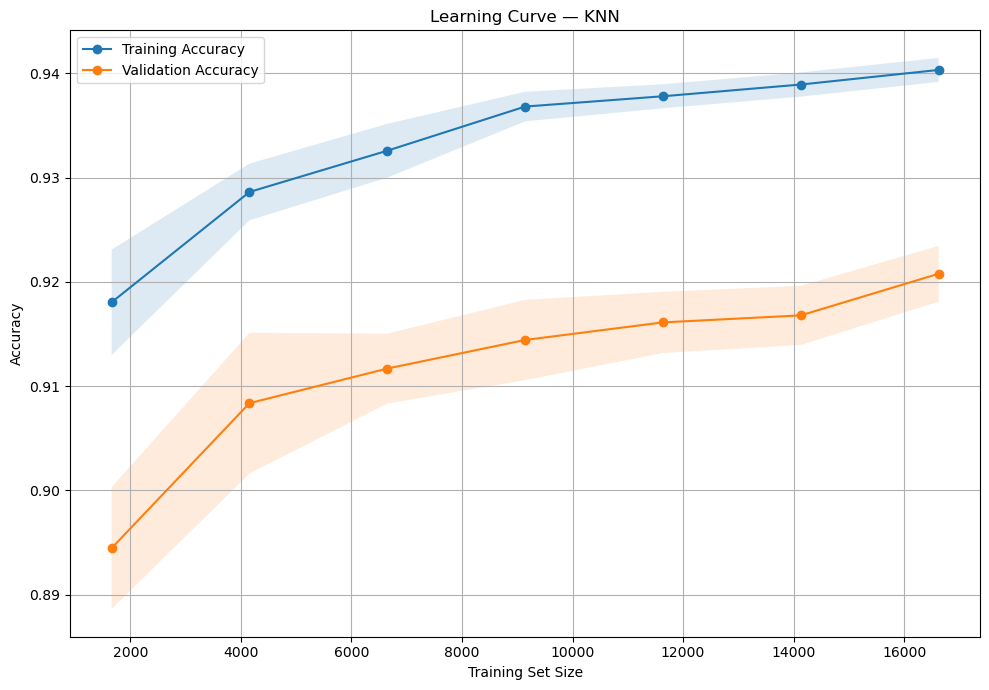

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define the KNN model

estimator=best_knn


# -----------------------------
# 2. Generate the learning curve
# -----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_knn,
    X=X_train_knn,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 7)
)


# -----------------------------
# 3. Compute means and std
# -----------------------------
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean = np.mean(val_scores, axis=1)
val_std  = np.std(val_scores, axis=1)

# -----------------------------
# 4. Plot (same TA style)
# -----------------------------
plt.figure(figsize=(10,7))

plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.15)

plt.title("Learning Curve — KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<br><br><br><br>

# Performance Comparision

## My Performance Evaluation Measures

- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- ROC curve


===== Decision Tree Evaluation =====
Accuracy:  0.9130
Precision: 0.9079
Recall:    0.8894
F1-score:  0.8986


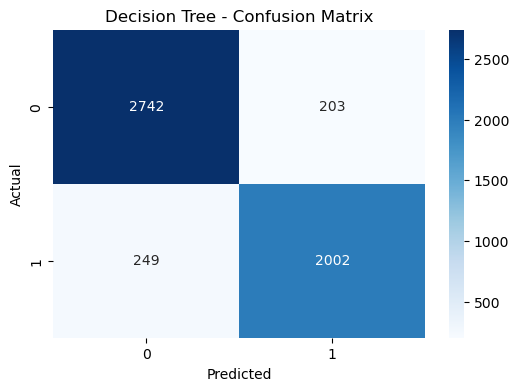


===== Logistic Regression Evaluation =====
Accuracy:  0.8557
Precision: 0.8376
Recall:    0.8272
F1-score:  0.8324


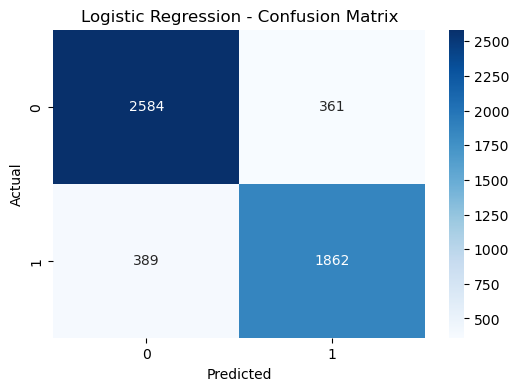


===== KNN Evaluation =====
Accuracy:  0.9142
Precision: 0.9204
Recall:    0.8778
F1-score:  0.8986


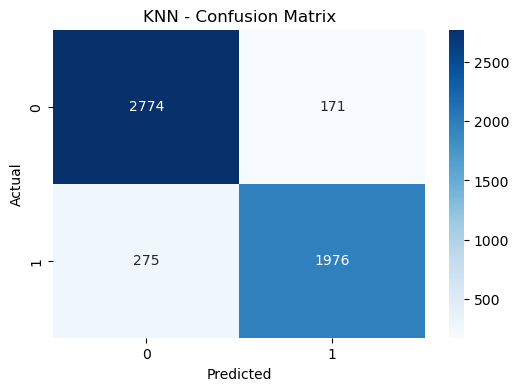

In [56]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # NON-WEIGHTED METRICS (binary classification)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n===== {name} Evaluation =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1, cm

results = {}

# Decision Tree
results["Decision Tree"] = evaluate_model(
    "Decision Tree", best_dt, X_test_dt, y_test
)

# Logistic Regression
results["Logistic Regression"] = evaluate_model(
    "Logistic Regression", best_log_model, X_test_log, y_test
)

# KNN
results["KNN"] = evaluate_model(
    "KNN", best_knn, X_test_knn, y_test
)


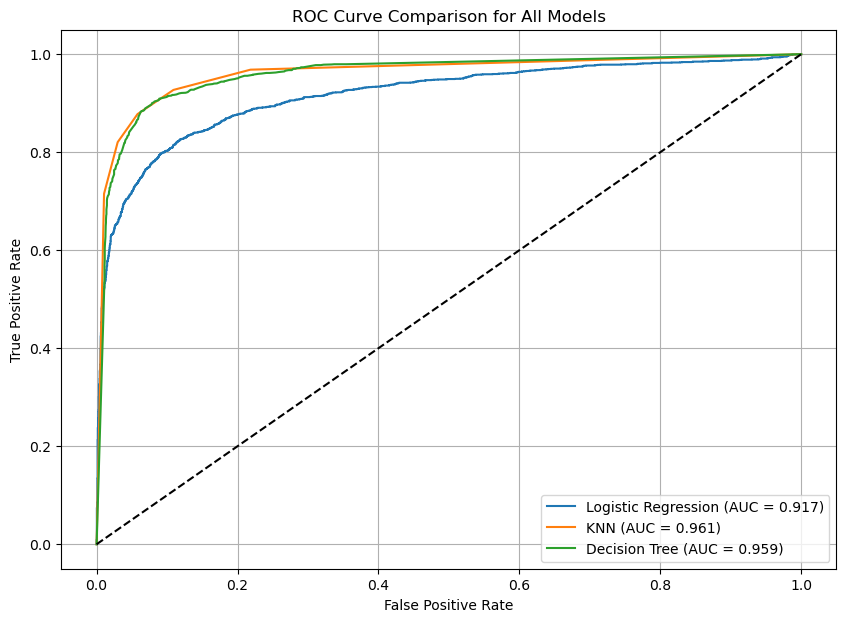

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

plt.figure(figsize=(10,7))

# -------------------------------------------
# Logistic Regression ROC
# -------------------------------------------
y_score_log = best_log_model.predict_proba(X_test_log)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
auc_log = auc(fpr_log, tpr_log)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")


# -------------------------------------------
# KNN ROC
# -------------------------------------------
y_score_knn = best_knn.predict_proba(X_test_knn)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")


# -------------------------------------------
# Decision Tree ROC
# -------------------------------------------
y_score_dt = best_dt.predict_proba(X_test_dt)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")


# -------------------------------------------
# Plot formatting
# -------------------------------------------
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.title("ROC Curve Comparison for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [60]:
import pandas as pd

metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]).T
metrics_df


,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Decision Tree,0.91301,0.907937,0.889382,0.898564,"[[2742, 203], [249, 2002]]"
Logistic Regression,0.855658,0.837607,0.827188,0.832365,"[[2584, 361], [389, 1862]]"
KNN,0.914165,0.920354,0.877832,0.89859,"[[2774, 171], [275, 1976]]"
